5주차 과제 내용

In [1]:
import keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings

from keras import datasets, layers, models
from keras import regularizers
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense, BatchNormalization
from keras.optimizers import Adam
from keras.models import load_model
from keras.utils import np_utils
from keras.utils import to_categorical
from keras.datasets import cifar10

warnings.filterwarnings(action='ignore')

In [2]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [3]:
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


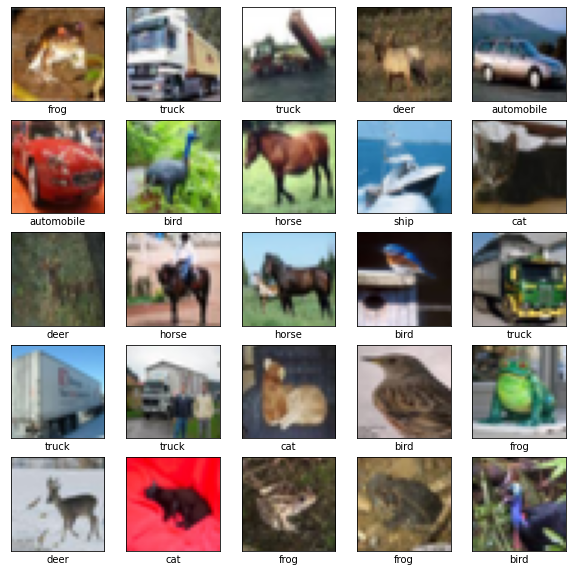

In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=[10,10])

for i in range (25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [5]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
train_images = train_images / 255
test_images = test_images / 255 

num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [6]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(Conv2D(64, (3, 3), activation='relu', padding='same')) 
model.add(MaxPool2D(pool_size=(2, 2))) 
model.add(Dropout(0.25))

model.add(Flatten()) 
model.add(Dense(512, activation='relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 64)          0

In [7]:
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.001), metrics=['acc'])

In [8]:
history = model.fit(train_images, train_labels, batch_size=128, epochs=10, validation_split=0.1)

Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
352/352 [==============================] - ETA: 0s - loss: 1.6083 - acc: 0.4091WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x0000017349A7DEE8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and

In [9]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.6539 - acc: 0.7810


---------------------

6주차 과제

In [10]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

In [11]:
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
 
train_images = train_images / 255
test_images = test_images / 255 

num_classes = 10
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [12]:
model = Sequential()

model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.3))

model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3,3), padding='same', activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2,2)))
model.add(layers.Dropout(0.5))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization (BatchNo (None, 32, 32, 32)        128       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 16, 16, 64)       

In [13]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [14]:
history = model.fit(train_images, train_labels, batch_size=64, epochs=50,
                    validation_data=(test_images, test_labels))

Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
782/782 [==============================] - ETA: 0s - loss: 1.7299 - accuracy: 0.4070WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x00000173624B8AF8> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`

Epoch 45/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3372 - accuracy: 0.8839 - val_loss: 0.4231 - val_accuracy: 0.8609
Epoch 46/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3277 - accuracy: 0.8879 - val_loss: 0.4165 - val_accuracy: 0.8655
Epoch 47/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3283 - accuracy: 0.8871 - val_loss: 0.4050 - val_accuracy: 0.8679
Epoch 48/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3231 - accuracy: 0.8877 - val_loss: 0.4556 - val_accuracy: 0.8547
Epoch 49/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3237 - accuracy: 0.8876 - val_loss: 0.3932 - val_accuracy: 0.8697
Epoch 50/50
782/782 [==============================] - 5s 7ms/step - loss: 0.3186 - accuracy: 0.8894 - val_loss: 0.4213 - val_accuracy: 0.8634


Text(0.5, 1.0, 'Loss Curves')

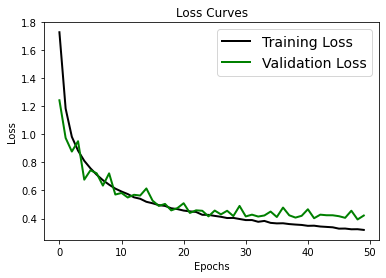

In [15]:
plt.figure(figsize=[6,4])
plt.plot(history.history['loss'], 'black', linewidth=2.0)
plt.plot(history.history['val_loss'], 'green', linewidth=2.0)
plt.legend(['Training Loss', 'Validation Loss'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Loss Curves', fontsize=12)

Text(0.5, 1.0, 'Accuracy Curves')

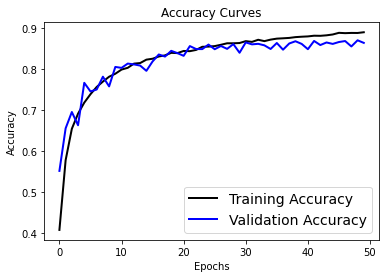

In [16]:
plt.figure(figsize=[6,4])
plt.plot(history.history['accuracy'], 'black', linewidth=2.0)
plt.plot(history.history['val_accuracy'], 'blue', linewidth=2.0)
plt.legend(['Training Accuracy', 'Validation Accuracy'], fontsize=14)
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Accuracy Curves', fontsize=12)

In [18]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.4213 - accuracy: 0.8634


In [19]:
pred = model.predict(test_images)
print(pred)

pred_classes = np.argmax(pred, axis=1)
print(pred_classes)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[[1.3878828e-07 1.2971979e-08 2.4241110e-06 ... 3.3533942e-07
  4.3929528e-08 1.4703411e-08]
 [2.8366335e-06 1.4010747e-04 1.4166971e-09 ... 3.6406055e-11
  9.9985635e-01 6.9708807e-07]
 [1.6345596e-03 9.1969021e-02 2.7521681e-05 ... 2.3088925e-05
  9.0437508e-01 1.2478916e-03]
 ...
 [2.9264349e-08 2.6854936e-08 3.7966733e-05 ... 2.3733824e-04
  1.4071301e-07 2.6653270e-08]
 

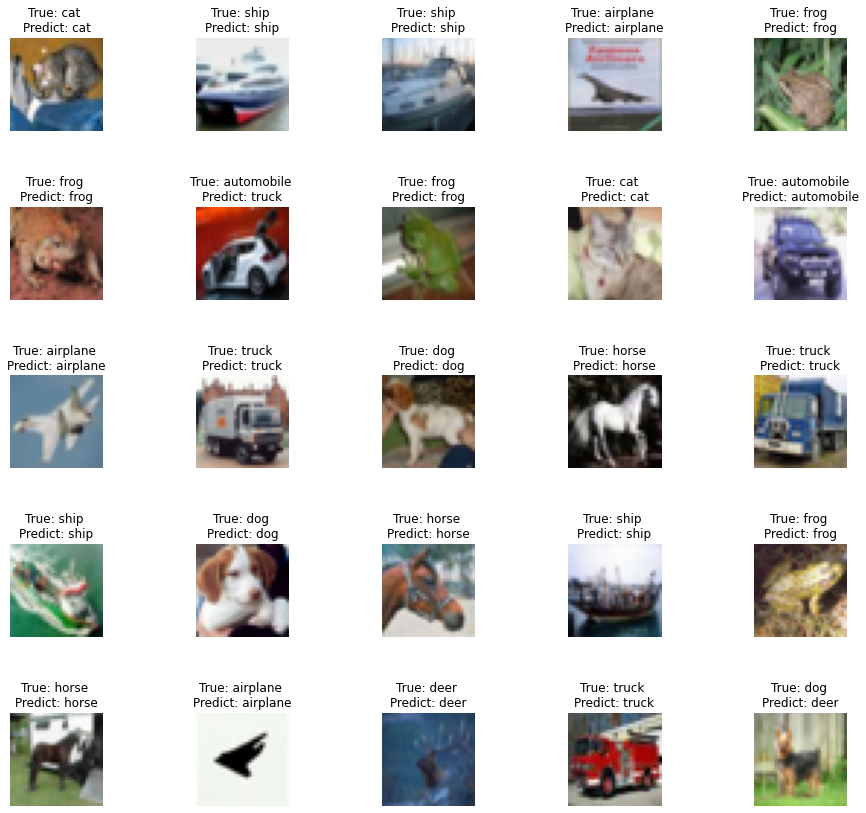

In [20]:
fig, axes = plt.subplots(5, 5, figsize=(15,15))
axes = axes.ravel()

for i in np.arange(0, 25):
    axes[i].imshow(test_images[i])
    axes[i].set_title("True: %s \nPredict: %s" % (class_names[np.argmax(test_labels[i])], class_names[pred_classes[i]]))
    axes[i].axis('off')
    plt.subplots_adjust(wspace=1)

**참고자료**

* [Simple Cifar10 CNN Keras code with 88% Accuracy](https://www.kaggle.com/ektasharma/simple-cifar10-cnn-keras-code-with-88-accuracy)  
* [Image Classification with CNN (Feat. CIFAR-10 and Keras](https://hdevstudy.tistory.com/116)